# Layer Activation Functions

### Using Keras 
The below two methods are equivalent

In [1]:
# define activation function as parameter
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation='relu'))

In [2]:
# define activation as layer
from tensorflow.keras import layers
from tensorflow.keras import activations

model.add(layers.Dense(64))
model.add(layers.Activation(activations.relu))

In [3]:
# directly call activation function as parameter
model.add(layers.Dense(64, activation=activations.relu))

In [173]:
import numpy as np
import pandas as pd
pd.set_option('chained_assignment',None)
import matplotlib.pyplot as plt
%matplotlib inline

#### Design the Plot

In [218]:
def plot_curve(func, idx1=5, idx2=-5):
    x1 = np.linspace(-10,10,100)
    y1 = list(map(func, x1))

    x2 = np.arange(-8,9,step=1)
    y2 = list(map(func, x2))

    plt.figure(figsize=(12,4))
    plt.style.use('grayscale')
    _ = plt.plot(x1, y1, c='b', linewidth=2)
    _ = plt.scatter(x2, y2, c='r', alpha=1, s=100)

    plt.xticks(x2)
    plt.yticks(y2[idx1:idx2])
    plt.title(f"{func.__name__} Activation Function")

## ReLU (Rectified Linear Unit)


In [144]:
%%latex
$$\begin{equation*}
a = f(x) = \left\{
        \begin{array}{ll}
            0 & \quad x \leq 0 \\
            x & \quad x > 0
        \end{array}
    \right.
\end{equation*}
$$

<IPython.core.display.Latex object>

#### Visualization with Numpy Implementation

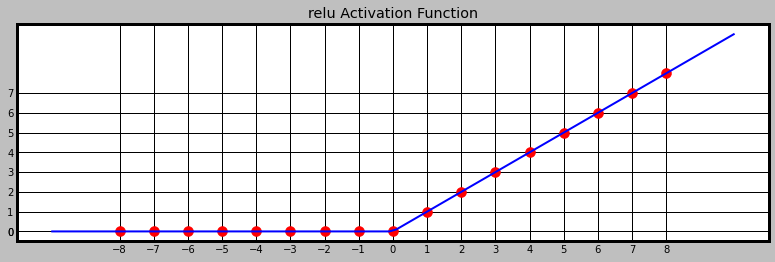

In [219]:
def relu(x):
    return max(x,0)

plot_curve(relu, 7, -1)

## ELU (Exponential Linear Unit)

In [6]:
%%latex
$$\begin{equation*}
a = f(x) = \left\{
        \begin{array}{ll}
            \alpha(e^{x}-1) & \quad x \leq 0 \\
            x & \quad x > 0
        \end{array}
    \right.
\end{equation*}
$$

<IPython.core.display.Latex object>

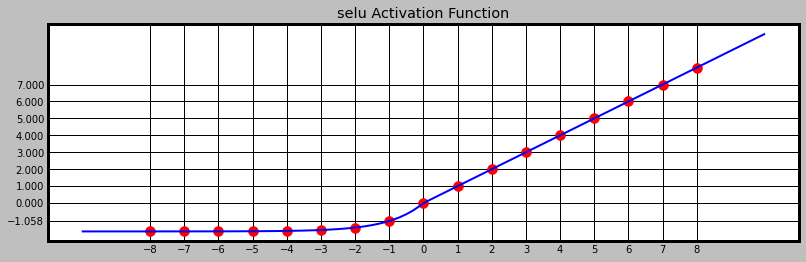

In [220]:
def selu(x):
    alpha=1.67326324
    if x > 0:
        return x
    return alpha * (np.exp(x) - 1)

plot_curve(selu, 7,-1)

## SELU (Scaled Exponential Linear Unit)
where alpha and scale are pre-defined constants (alpha=1.67326324 and scale=1.05070098).

Basically, the SELU activation function multiplies scale (> 1) with the output of the tf.keras.activations.elu function to ensure a slope larger than one for positive inputs.

The values of alpha and scale are chosen so that the mean and variance of the inputs are preserved between two consecutive layers as long as the weights are initialized correctly (see tf.keras.initializers.LecunNormal initializer) and the number of input units is "large enough" (see reference paper for more information).

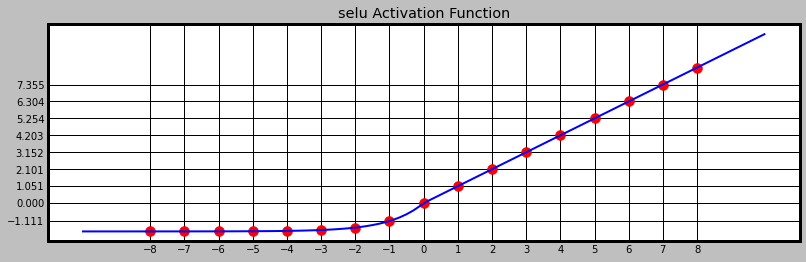

In [221]:
def selu(x):
    alpha=1.67326324
    scale=1.05070098
    if x > 0:
        return scale * x
    return scale * alpha * (np.exp(x) - 1)

plot_curve(selu, 7,-1)

## Sigmoid

The Sigmoid function is that it maps anything on the real numbers line from to the open interval (0, 1) which can be interpreted as probability. The mathematical formula of the Sigmoid function is as below:

In [126]:
%%latex
$$\sigma(x)=\frac{1}{1+e^{-x}}$$

<IPython.core.display.Latex object>

#### Visualizaiton with Numpy Implementation

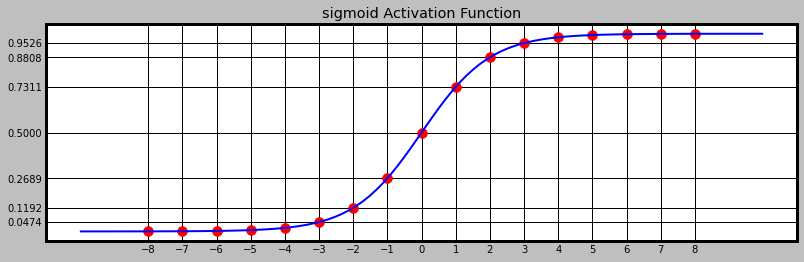

In [230]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

plot_curve(sigmoid)

In [62]:
sigmoid(10)

0.9999546021312976

In [121]:
sigmoid(-10)

4.5397868702434395e-05

#### Properties of the Sigmoid Function
* the output at 0 is always 0.5
* the output is always bounded within (0,1)
* as the input value deviates from 0, the output changes slower and slower
* sigmoid(10) ~ 0.9995 and sigmoid(-10) ~ 0.0005
* output values of multiplicative inverses are always probabilitic complements

In [127]:
%%latex
$$\sigma(x) = 1 - \sigma(-x)$$

<IPython.core.display.Latex object>

#### Keras Implementation

In [112]:
model.add(Dense(64, activation='sigmoid'))
# OR
model.add(layers.Activation(activations.sigmoid))

#### PyTorch Implementation
https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html

In [267]:
import torch.nn as nn
a = nn.Sigmoid()
t = torch.from_numpy(np.array([-10,0,10]))
a(t)

tensor([4.5398e-05, 5.0000e-01, 9.9995e-01])

#### TensorFlow Implementation
* tf.sigmoid
* tf.math.sigmoid https://www.tensorflow.org/api_docs/python/tf/math/sigmoid
* tf.keras.activations.sigmoid https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid

In [117]:
import tensorflow as tf
t1 = tf.constant([-10], dtype=tf.float32)
t2 = tf.constant([-10, 0, 10], dtype=tf.float32)

display(tf.sigmoid(t1))
display(tf.sigmoid(t2))
# OR
display(tf.math.sigmoid(t1))
display(tf.math.sigmoid(t2))
# OR
display(tf.keras.activations.sigmoid(t1))
display(tf.keras.activations.sigmoid(t2))

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([4.539993e-05], dtype=float32)>

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([4.539993e-05, 5.000000e-01, 9.999546e-01], dtype=float32)>

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([4.539993e-05], dtype=float32)>

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([4.539993e-05, 5.000000e-01, 9.999546e-01], dtype=float32)>

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([4.539993e-05], dtype=float32)>

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([4.539993e-05, 5.000000e-01, 9.999546e-01], dtype=float32)>

#### TensorFlow Probability API
https://www.tensorflow.org/probability/api_docs/python/tfp/bijectors/Sigmoid

In [136]:
# needs separate install
import tensorflow_probability as tfp
a = tfp.bijectors.Sigmoid()
a(t2)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([4.539993e-05, 5.000000e-01, 9.999546e-01], dtype=float32)>

## Tanh

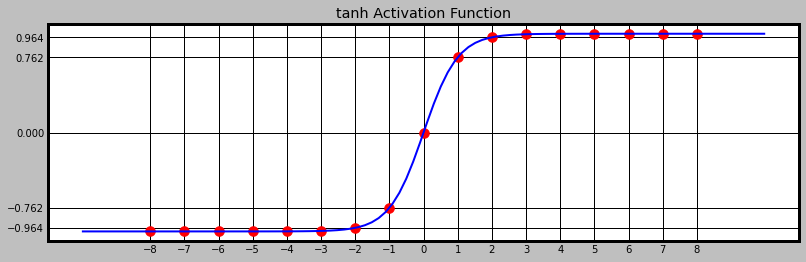

In [232]:
def tanh(x):
    return np.tanh(x)

plot_curve(tanh, 6, -6)

## SoftPlus

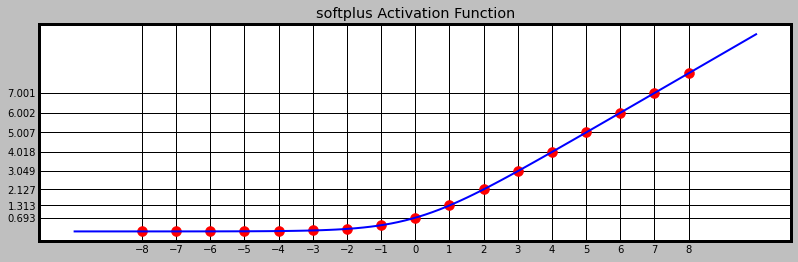

In [238]:
def softplus(x):
    return np.log(np.exp(x) + 1)

plot_curve(softplus, 8, -1)

## SoftSign

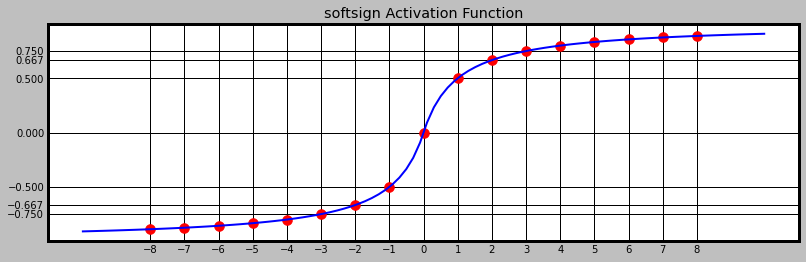

In [234]:
def softsign(x):
    return x / (np.abs(x) + 1)

plot_curve(softsign)

## SoftMax

Text(0.5, 1.0, 'SoftMax Activation Function')

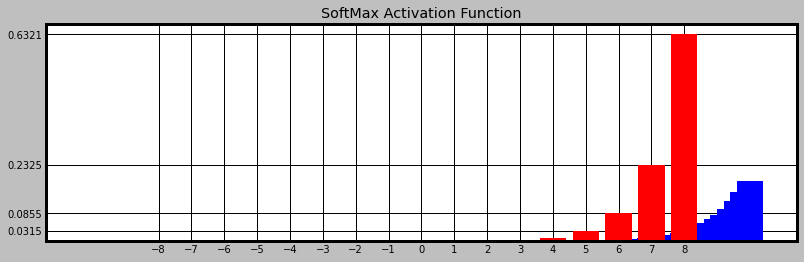

In [265]:
def softmax(x):
    return np.exp(x) / sum(np.exp(x))

x1 = np.linspace(-10,10,100)
y1 = softmax(x1)

x2 = np.arange(-8,9,step=1)
y2 = softmax(x2)

plt.figure(figsize=(12,4))
plt.style.use('grayscale')
_ = plt.bar(x1, y1, color='b')
_ = plt.bar(x2, y2, color='r')

plt.xticks(x2)
plt.yticks(y2[-4:])
plt.title("SoftMax Activation Function")